# 사전 훈련된 워드 임베딩(Pre-trained Word Embedding)

### 케라스 임베딩 층(Keras Embedding layer)

#### 1) 임베딩 층은 룩업 테이블이다.

어떤 단어 → 단어에 부여된 고유한 정수값 → 임베딩 층 통과 → 밀집 벡터  

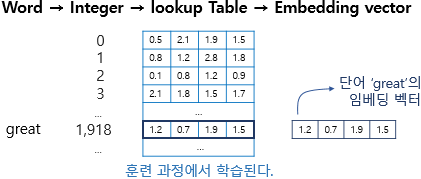

<pre>
# 아래의 각 인자는 저자가 임의로 선정한 숫자들이며 의미있는 선정 기준이 아님.
v = Embedding(20000, 128, input_length=500)
# vocab_size = 20000
# output_dim = 128
# input_length = 500
</pre>
- vocab_size : 텍스트 데이터의 전체 단어 집합의 크기입니다.
- output_dim : 워드 임베딩 후의 임베딩 벡터의 차원입니다.
- input_length : 입력 시퀀스의 길이입니다. 만약 갖고있는 각 샘플의 길이가 500개의 단어로 구성되어있다면 이 값은 500이 됩니다.

#### 2) 임베딩 층 사용하기

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [5]:
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
# 정답 레이블(감성)
y_train = [1, 0, 0, 1, 1, 0, 1]

In [7]:
t =  Tokenizer()
t.fit_on_texts(sentences)
vocab_size = len(t.word_index) + 1

print(vocab_size)

16


In [8]:
X_encoded = t.texts_to_sequences(sentences)
print(X_encoded)

[[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [9]:
max_len = max(len(l) for l in X_encoded)
print(max_len)

4


In [12]:
X_train = pad_sequences(X_encoded, maxlen=max_len, padding='pre')
y_train = np.array(y_train)
print('X_train : ')
print(X_train)
print('y_train : ')
print(y_train)

X_train : 
[[ 1  2  3  4]
 [ 0  0  5  6]
 [ 0  0  7  8]
 [ 0  0  9 10]
 [ 0  0 11 12]
 [ 0  0  0 13]
 [ 0  0 14 15]]
y_train : 
[1 0 0 1 1 0 1]


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

In [19]:
model = Sequential()
model.add(Embedding(vocab_size, 4, input_length = max_len))
model.add(Flatten()) # Dense의 입력으로 넣기위함.
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=50, verbose=2)

Train on 7 samples
Epoch 1/50
7/7 - 1s - loss: 0.6888 - acc: 0.7143
Epoch 2/50
7/7 - 0s - loss: 0.6875 - acc: 0.7143
Epoch 3/50
7/7 - 0s - loss: 0.6862 - acc: 0.7143
Epoch 4/50
7/7 - 0s - loss: 0.6849 - acc: 0.7143
Epoch 5/50
7/7 - 0s - loss: 0.6836 - acc: 0.7143
Epoch 6/50
7/7 - 0s - loss: 0.6823 - acc: 0.8571
Epoch 7/50
7/7 - 0s - loss: 0.6810 - acc: 0.8571
Epoch 8/50
7/7 - 0s - loss: 0.6797 - acc: 0.8571
Epoch 9/50
7/7 - 0s - loss: 0.6784 - acc: 1.0000
Epoch 10/50
7/7 - 0s - loss: 0.6770 - acc: 1.0000
Epoch 11/50
7/7 - 0s - loss: 0.6757 - acc: 1.0000
Epoch 12/50
7/7 - 0s - loss: 0.6744 - acc: 1.0000
Epoch 13/50
7/7 - 0s - loss: 0.6731 - acc: 1.0000
Epoch 14/50
7/7 - 0s - loss: 0.6717 - acc: 1.0000
Epoch 15/50
7/7 - 0s - loss: 0.6704 - acc: 1.0000
Epoch 16/50
7/7 - 0s - loss: 0.6691 - acc: 1.0000
Epoch 17/50
7/7 - 0s - loss: 0.6677 - acc: 1.0000
Epoch 18/50
7/7 - 0s - loss: 0.6664 - acc: 1.0000
Epoch 19/50
7/7 - 0s - loss: 0.6650 - acc: 1.0000
Epoch 20/50
7/7 - 0s - loss: 0.6636 - ac

### 사전 훈련된 워드 임베딩(Pre-Trained Word Embedding) 사용하기

GloVe 다운로드 링크 : http://nlp.stanford.edu/data/glove.6B.zip  
Word2Vec 다운로드 링크 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM

In [23]:
print(X_train)
print(y_train)

[[ 1  2  3  4]
 [ 0  0  5  6]
 [ 0  0  7  8]
 [ 0  0  9 10]
 [ 0  0 11 12]
 [ 0  0  0 13]
 [ 0  0 14 15]]
[1 0 0 1 1 0 1]


In [25]:
n = 0
f = open('C:/Users/it/Downloads/dataset/model/glove.6B/glove.6B.100d.txt', encoding="utf-8")

for line in f:
    word_vector = line.split()
    print(word_vector)
    word = word_vector[0]
    print(word)
    n = n + 1
    if n==2:
        break
f.close()

['the', '-0.038194', '-0.24487', '0.72812', '-0.39961', '0.083172', '0.043953', '-0.39141', '0.3344', '-0.57545', '0.087459', '0.28787', '-0.06731', '0.30906', '-0.26384', '-0.13231', '-0.20757', '0.33395', '-0.33848', '-0.31743', '-0.48336', '0.1464', '-0.37304', '0.34577', '0.052041', '0.44946', '-0.46971', '0.02628', '-0.54155', '-0.15518', '-0.14107', '-0.039722', '0.28277', '0.14393', '0.23464', '-0.31021', '0.086173', '0.20397', '0.52624', '0.17164', '-0.082378', '-0.71787', '-0.41531', '0.20335', '-0.12763', '0.41367', '0.55187', '0.57908', '-0.33477', '-0.36559', '-0.54857', '-0.062892', '0.26584', '0.30205', '0.99775', '-0.80481', '-3.0243', '0.01254', '-0.36942', '2.2167', '0.72201', '-0.24978', '0.92136', '0.034514', '0.46745', '1.1079', '-0.19358', '-0.074575', '0.23353', '-0.052062', '-0.22044', '0.057162', '-0.15806', '-0.30798', '-0.41625', '0.37972', '0.15006', '-0.53212', '-0.2055', '-1.2526', '0.071624', '0.70565', '0.49744', '-0.42063', '0.26148', '-1.538', '-0.30223

In [26]:
print(type(word_vector))
print(len(word_vector))

<class 'list'>
101


In [24]:
import numpy as np

In [27]:
embedding_dict = dict()
f = open('C:/Users/it/Downloads/dataset/model/glove.6B/glove.6B.100d.txt', encoding="utf-8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
    embedding_dict[word] = word_vector_arr
f.close()
print('%s개의 Embedding vector가 있습니다.' %len(embedding_dict))

400000개의 Embedding vector가 있습니다.


In [29]:
print(embedding_dict['able'])
print(len(embedding_dict['able']))

[-0.26057   0.13497  -0.30116  -0.060855 -0.6226   -0.14868  -0.3421
  0.010509  0.30815  -0.16048   0.23701   0.21842   0.31249  -0.47274
 -0.32105  -0.55265   0.45469   0.75399  -0.51536   0.24941   0.13832
 -0.24741   0.20935  -0.248    -0.41075  -0.45544  -0.35843  -0.57247
  1.0253   -0.21348  -0.34057   0.79428  -0.3984    0.013216  0.78371
  0.27445  -0.27586   0.11772   0.33587   0.044887 -0.40725  -0.058387
 -0.093796 -0.80225  -0.15635   0.16576   0.28127  -0.31268   0.075171
 -0.87361  -0.15511   0.12278   0.3186    1.0496    0.76569  -2.2818
 -0.042756 -0.36131   1.5883    0.26367   0.081247  0.72454  -0.66271
  0.17178   0.90291   0.23845   0.10645   0.62819  -0.27068  -0.51977
  0.16073  -0.63504   0.19489  -0.6877    0.29835  -0.066108 -0.60602
 -0.32513  -0.12218   0.095966  0.61644   0.18535  -0.73239  -0.012384
 -1.6379   -0.21334   0.72614   0.18554  -0.39467   0.07759   0.010402
 -0.028466  0.26891  -0.7474   -0.56966  -0.01743  -0.079698 -0.46821
  0.32484  -0.0786

In [32]:
embedding_matrix = np.zeros((vocab_size, 100))
np.shape(embedding_matrix)

(16, 100)

In [33]:
print(t.word_index.items())

dict_items([('nice', 1), ('great', 2), ('best', 3), ('amazing', 4), ('stop', 5), ('lies', 6), ('pitiful', 7), ('nerd', 8), ('excellent', 9), ('work', 10), ('supreme', 11), ('quality', 12), ('bad', 13), ('highly', 14), ('respectable', 15)])


In [34]:
for word, i in t.word_index.items():
    temp = embedding_dict.get(word) # 단어(key) 해당되는 임베딩 벡터의 100개의 값(value)를 임시 변수에 저장
    if temp is not None:
        embedding_matrix[i] = temp # 임수 변수의 값을 단어와 맵핑되는 인덱스의 행에 삽입

In [48]:
print(embedding_matrix[1:2]) # nice

[[-0.18554001  0.047152    0.34867001 -0.23114    -0.26082999  0.63107997
   0.55686998  0.61622    -0.15436999 -0.38381001  0.12445    -0.26999
  -0.29196     0.1125      0.36035001  0.70688999 -0.33891001 -0.26949999
   0.17481001  0.97048002  0.23014     0.63168001 -0.24542999 -0.72890002
   0.32517001 -0.21118    -0.80353999 -0.59863001 -0.10182    -0.87826002
  -0.80162001  0.20998999  0.64598    -0.38238999  0.64512002  0.73045999
  -0.19881     0.35716999  0.19135    -0.43686     0.75955999 -0.66430998
   0.34509    -1.03830004 -0.50490999  0.19976    -0.041208    0.16952001
   0.17821001 -0.84249002  0.21991999 -0.16474    -0.24669001  0.34117001
  -0.59713    -2.3434      0.31483999  0.69668001  0.53368002 -0.62857002
  -0.197       0.52240998 -1.59029996 -0.16474999  0.62553    -0.094116
   0.0070705   0.22617    -0.45697999 -0.53267998  0.11573    -0.19052
   0.28086001 -0.55909997  0.35291001  0.42552     0.47334    -0.41046
   0.47275001  0.22753    -0.097073   -0.11809   

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

In [50]:
model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_len, trainable=False)

사전 훈련된 워드 임베딩을 그대로 사용할 것이므로, 별도로 더 이상 훈련을 하지 않는다는 옵션을 줍니다. 이는 trainable=False로 선택할 수 있습니다.

In [51]:
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Train on 7 samples
Epoch 1/100
7/7 - 0s - loss: 0.8933 - acc: 0.2857
Epoch 2/100
7/7 - 0s - loss: 0.8665 - acc: 0.4286
Epoch 3/100
7/7 - 0s - loss: 0.8408 - acc: 0.4286
Epoch 4/100
7/7 - 0s - loss: 0.8160 - acc: 0.4286
Epoch 5/100
7/7 - 0s - loss: 0.7922 - acc: 0.4286
Epoch 6/100
7/7 - 0s - loss: 0.7694 - acc: 0.4286
Epoch 7/100
7/7 - 0s - loss: 0.7476 - acc: 0.4286
Epoch 8/100
7/7 - 0s - loss: 0.7268 - acc: 0.4286
Epoch 9/100
7/7 - 0s - loss: 0.7070 - acc: 0.4286
Epoch 10/100
7/7 - 0s - loss: 0.6880 - acc: 0.2857
Epoch 11/100
7/7 - 0s - loss: 0.6700 - acc: 0.4286
Epoch 12/100
7/7 - 0s - loss: 0.6527 - acc: 0.4286
Epoch 13/100
7/7 - 0s - loss: 0.6363 - acc: 0.5714
Epoch 14/100
7/7 - 0s - loss: 0.6205 - acc: 0.5714
Epoch 15/100
7/7 - 0s - loss: 0.6055 - acc: 0.5714
Epoch 16/100
7/7 - 0s - loss: 0.5911 - acc: 0.7143
Epoch 17/100
7/7 - 0s - loss: 0.5774 - acc: 0.7143
Epoch 18/100
7/7 - 0s - loss: 0.5642 - acc: 0.7143
Epoch 19/100
7/7 - 0s - loss: 0.5515 - acc: 0.7143
Epoch 20/100
7/7 - 0s

#### 2) 사전 훈련된 Word2Vec 사용하기

In [53]:
import gensim

In [54]:
import glove

ImportError: Building module glove.glove_inner failed: ['distutils.errors.DistutilsPlatformError: Unable to find vcvarsall.bat\n']

In [56]:
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('C:/Users/it/Downloads/dataset/model/GoogleNews-vectors-negative300.bin',binary=True)

In [57]:
print(word2vec_model.vectors.shape) # 모델의 크기 확인

(3000000, 300)


In [58]:
embedding_matrix = np.zeros((vocab_size, 300))
np.shape(embedding_matrix)

(16, 300)

In [59]:
def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

In [60]:
for word, i in t.word_index.items():
    temp = get_vector(word)
    if temp is not None:
        embedding_matrix[i] = temp

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False)

In [62]:
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Train on 7 samples
Epoch 1/100
7/7 - 28s - loss: 0.6985 - acc: 0.4286
Epoch 2/100
7/7 - 0s - loss: 0.6803 - acc: 0.4286
Epoch 3/100
7/7 - 0s - loss: 0.6625 - acc: 0.4286
Epoch 4/100
7/7 - 0s - loss: 0.6453 - acc: 0.7143
Epoch 5/100
7/7 - 0s - loss: 0.6287 - acc: 0.8571
Epoch 6/100
7/7 - 0s - loss: 0.6126 - acc: 1.0000
Epoch 7/100
7/7 - 0s - loss: 0.5971 - acc: 1.0000
Epoch 8/100
7/7 - 0s - loss: 0.5820 - acc: 1.0000
Epoch 9/100
7/7 - 0s - loss: 0.5675 - acc: 1.0000
Epoch 10/100
7/7 - 0s - loss: 0.5534 - acc: 1.0000
Epoch 11/100
7/7 - 0s - loss: 0.5398 - acc: 1.0000
Epoch 12/100
7/7 - 0s - loss: 0.5267 - acc: 1.0000
Epoch 13/100
7/7 - 0s - loss: 0.5140 - acc: 1.0000
Epoch 14/100
7/7 - 0s - loss: 0.5017 - acc: 1.0000
Epoch 15/100
7/7 - 0s - loss: 0.4898 - acc: 1.0000
Epoch 16/100
7/7 - 0s - loss: 0.4783 - acc: 1.0000
Epoch 17/100
7/7 - 0s - loss: 0.4672 - acc: 1.0000
Epoch 18/100
7/7 - 0s - loss: 0.4564 - acc: 1.0000
Epoch 19/100
7/7 - 0s - loss: 0.4460 - acc: 1.0000
Epoch 20/100
7/7 - 0